Customer's segmentation Project:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesaler

Step 1:

Import required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import datetime as dt
import plotly.express as px


Step 2:

Load Data base

In [2]:
Customer_df=pd.read_csv(r'D:\courses\Technu lab\machine learning final project\Customer Segmentation\online+retail+ii\online_retail_II.csv')


First take a copy as a backup for data and let's name it as "Customer_df_Backup"

In [3]:
Customer_df_Backup=Customer_df.copy()

In [4]:
"""explore data frame shape"""
Customer_df.shape

(541910, 8)

Step 3:

EDA (explouring data and cleaning)
first we need to explore the data:

In [5]:
"""Check if ther's Na values"""
Customer_df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

It's seems there's missing values in Discription Coloumn and Customer ID

In [6]:
"""Print data frame information for better understanding"""
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
Customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
"""print first 5 rows from our data frame"""
Customer_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
"""print last 5 rows from our data frame"""
Customer_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [10]:
Customer_df.sample(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
21045,538071,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,2,12/9/2010 14:09,1.66,NaN,United Kingdom
118728,546466,22324,BLUE POLKADOT KIDS BAG,2,3/14/2011 11:04,1.95,18118.0,United Kingdom
515895,579792,23211,RED ROCKING HORSE HAND PAINTED,24,11/30/2011 15:43,1.25,12714.0,France
310415,564184,84378,SET OF 3 HEART COOKIE CUTTERS,12,8/23/2011 15:11,1.25,NaN,EIRE
283511,561773,82578,KITCHEN METAL SIGN,4,7/29/2011 12:41,0.55,17841.0,United Kingdom
534977,581179,23294,SET OF 6 SNACK LOAF BAKING CASES,16,12/7/2011 15:43,0.83,12471.0,Germany
169809,551258,22570,FELTCRAFT CUSHION RABBIT,8,4/27/2011 12:02,3.75,12621.0,Germany
437036,574258,22489,PACK OF 12 TRADITIONAL CRAYONS,1,11/3/2011 13:50,0.42,16891.0,United Kingdom
182853,552614,22917,HERB MARKER ROSEMARY,12,5/10/2011 12:51,0.65,14849.0,United Kingdom
31733,539010,22175,PINK OWL SOFT TOY,3,12/15/2010 13:24,2.95,15005.0,United Kingdom


In [11]:
"""Check if there's duplication values in our data frame"""
Customer_df.duplicated().sum()

5268

The results shown us there's "5268" rows are duplicated

In [12]:
"""Exploring the name of columns"""
Customer_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

Now let's replace the fake information

In [13]:
"""Replace Israel to Palestine as it wrong information and make our dataframe unsafe in the future processes"""
Customer_df['Country'].replace('Israel', 'Palestine', inplace= True)

Data base now is more safe and looking better isn't right?


now we need to standard the Countries names like RSA and EIRE and return it to the original names

In [14]:
"""Reolace RSA to Repablic of South Africa"""
Customer_df["Country"].replace("RSA","South Africa", inplace= True)
"""EIRE to Ireland"""
Customer_df["Country"].replace("EIRE","Ireland", inplace= True)
"""USA to United States of America"""
Customer_df["Country"].replace("USA","United States of America", inplace= True)

In [15]:
"""#Display the Unique countries:"""
print('List of Countries:\n', Customer_df["Country"].value_counts())

List of Countries:
 Country
United Kingdom              495478
Germany                       9495
France                        8558
Ireland                       8196
Spain                         2533
Netherlands                   2371
Belgium                       2069
Switzerland                   2002
Portugal                      1519
Australia                     1259
Norway                        1086
Italy                          803
Channel Islands                758
Finland                        695
Cyprus                         622
Sweden                         462
Unspecified                    446
Austria                        401
Denmark                        389
Japan                          358
Poland                         341
Palestine                      297
United States of America       291
Hong Kong                      288
Singapore                      229
Iceland                        182
Canada                         151
Greece                     

Step 4:

Drop Nan Values and Douplicated and Un-needed values

In [16]:
"""Drop na values"""
Customer_df.dropna(how="any", inplace=True)

In [17]:
"""Drop data with Price = 0"""
Customer_df = Customer_df[Customer_df['Price'] != 0]

In [18]:
"""Drop the rows with the values 'Unspecified' """
Customer_df = Customer_df.drop(Customer_df[Customer_df['Country'] == 'Unspecified'].index)

In [19]:
Customer_df.drop_duplicates(inplace=True)

Step 5: 

Features Engineering 

In [20]:
"""Split Date, Year, Month, Time from INvoice Date"""
Customer_df['Date'] = Customer_df['InvoiceDate'].apply(lambda x: x.split(' ')[0])
Customer_df['Time'] = Customer_df['InvoiceDate'].apply(lambda x: x.split(' ')[-1])
Customer_df['Month'] = Customer_df['Date'].apply(lambda x: x.split('/')[0])
Customer_df['Year'] = Customer_df['Date'].apply(lambda x: x.split('/')[-1])
"""Delete unneeded Coloumn"""
del(Customer_df["InvoiceDate"])

In [21]:
"""make months as categorical data"""
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Customer_df['Month'] = Customer_df['Month'].astype(int).map(month_names)
Customer_df['Month'] = pd.Categorical(Customer_df['Month'], categories=months_order, ordered=True)

"""Delete unneeded list or dir"""
del(month_names,months_order)

In [22]:
"""calculate the total Invoice for each Transaction"""
Customer_df["Total Invoice"]=Customer_df["Price"]*Customer_df["Quantity"]

In [23]:
"""calculate The income for each Month per year"""
Income_Per_Month = Customer_df.groupby(['Year', 'Month'])['Invoice'].count().reset_index()
Income_Per_Month.columns = ['Year', 'Month', 'Total_Invoices',]
Income_Per_Month

C:\Users\Moham\AppData\Local\Temp\ipykernel_28000\1083206014.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Income_Per_Month = Customer_df.groupby(['Year', 'Month'])['Invoice'].count().reset_index()


,Year,Month,Total_Invoices
0,2010,Jan,0
1,2010,Feb,0
2,2010,Mar,0
3,2010,Apr,0
4,2010,May,0
5,2010,Jun,0
6,2010,Jul,0
7,2010,Aug,0
8,2010,Sep,0
9,2010,Oct,0


make sence for as a retail start the business in Dec 2009 as it takes about 1 Year without income 

In [24]:
"""Rank countries based on total invoice"""
Countries_rank=Customer_df.groupby("Country")["Total Invoice"].sum().sort_values(ascending=False)
Countries_rank.head(10).sort_index(ascending=False)

Country
United Kingdom    6747156.154
Switzerland         55739.400
Sweden              36585.410
Spain               54756.030
Netherlands        284661.540
Ireland            250001.780
Germany            221509.470
France             196644.050
Belgium             40910.960
Australia          137009.770
Name: Total Invoice, dtype: float64

The United Kingdom is on the top of the list as highest country

In [25]:
"""Explore the Quantity for each product"""
P_Descriprion=Customer_df.groupby(["Description","Year","Month"]).agg({"Quantity": "sum","Total Invoice":"sum"}).sort_values("Quantity", ascending=False)
P_Descriprion

C:\Users\Moham\AppData\Local\Temp\ipykernel_28000\1639918951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  P_Descriprion=Customer_df.groupby(["Description","Year","Month"]).agg({"Quantity": "sum","Total Invoice":"sum"}).sort_values("Quantity", ascending=False)


,,,Quantity,Total Invoice
Description,Year,Month,,
RABBIT NIGHT LIGHT,2011,Nov,12281,23055.78
WORLD WAR 2 GLIDERS ASSTD DESIGNS,2011,Apr,10128,2253.60
POPCORN HOLDER,2011,Nov,8149,6242.72
WORLD WAR 2 GLIDERS ASSTD DESIGNS,2011,Oct,8078,1926.14
SMALL POPCORN HOLDER,2011,May,6729,4970.85
...,...,...,...,...
Manual,2011,Aug,-617,-1850.87
Discount,2011,Mar,-724,-224.21
TEA TIME PARTY BUNTING,2011,Apr,-952,-1712.40


In [26]:
"""Check canceled Invoices or returned"""
Customer_df["Invoice"].str.contains("c").count()

401324

In [27]:
'''Excude the canceled transactions to new data frame and let's rename it as "Customer_df_copy"'''
Customer_df=Customer_df[~Customer_df["Invoice"].str.contains("C", na=False)]

In [28]:
"""Group the data by Customer ID, Invoice, Country and take a copy of it"""
Customer_df_copy= Customer_df.groupby(['Invoice', 'Customer ID', 'Country',"Description","StockCode","Time","Date"]).agg({'Price': 'sum', 'Quantity':'sum'}).reset_index()
Customer_df_copy["Total_Price"]=Customer_df_copy["Price"]*Customer_df_copy["Quantity"]

In [29]:
'''check what grouped by did'''
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392452 entries, 0 to 541909
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Invoice        392452 non-null  object  
 1   StockCode      392452 non-null  object  
 2   Description    392452 non-null  object  
 3   Quantity       392452 non-null  int64   
 4   Price          392452 non-null  float64 
 5   Customer ID    392452 non-null  float64 
 6   Country        392452 non-null  object  
 7   Date           392452 non-null  object  
 8   Time           392452 non-null  object  
 9   Month          392452 non-null  category
 10  Year           392452 non-null  object  
 11  Total Invoice  392452 non-null  float64 
dtypes: category(1), float64(3), int64(1), object(7)
memory usage: 36.3+ MB


In [30]:
Customer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387610 entries, 0 to 387609
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      387610 non-null  object 
 1   Customer ID  387610 non-null  float64
 2   Country      387610 non-null  object 
 3   Description  387610 non-null  object 
 4   StockCode    387610 non-null  object 
 5   Time         387610 non-null  object 
 6   Date         387610 non-null  object 
 7   Price        387610 non-null  float64
 8   Quantity     387610 non-null  int64  
 9   Total_Price  387610 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 29.6+ MB


In [31]:
Customer_df_copy.isna().any().sum()

0

In [32]:
"""It's seems the data frame is minimized after useing grouped by"""

"It's seems the data frame is minimized after useing grouped by"

In [33]:
""" Apply it on original Data frame"""
Customer_df= Customer_df.groupby(['Invoice', 'Customer ID', 'Country',"Description","StockCode","Time","Date"]).agg({'Price': 'sum', 'Quantity':'sum'}).reset_index()
Customer_df["Total_Price"]=Customer_df_copy["Price"]*Customer_df_copy["Quantity"]

Step 6:

Data Visualization

<Axes: >

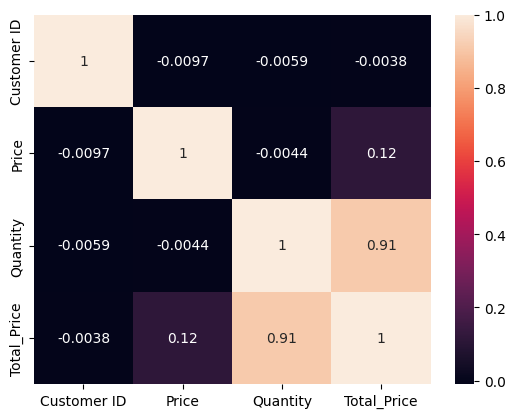

In [34]:
"""Make a corration for data frame"""
Customer_df_corr=Customer_df.corr(numeric_only=True)
sns.heatmap(Customer_df_corr,annot=True)

<Axes: xlabel='Month', ylabel='Total_Invoices'>

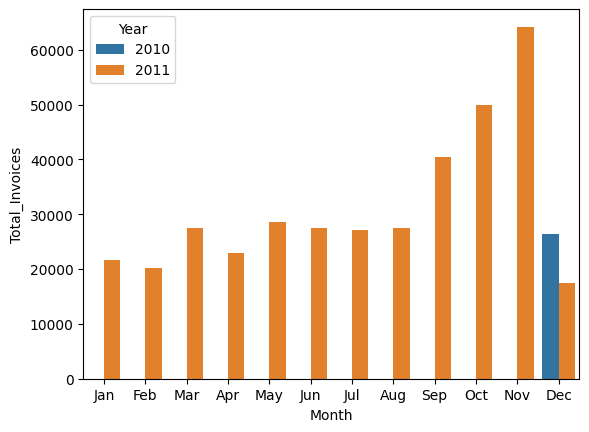

In [35]:
sns.barplot(x="Month",y="Total_Invoices",hue="Year",data=Income_Per_Month)

<Axes: xlabel='Country'>

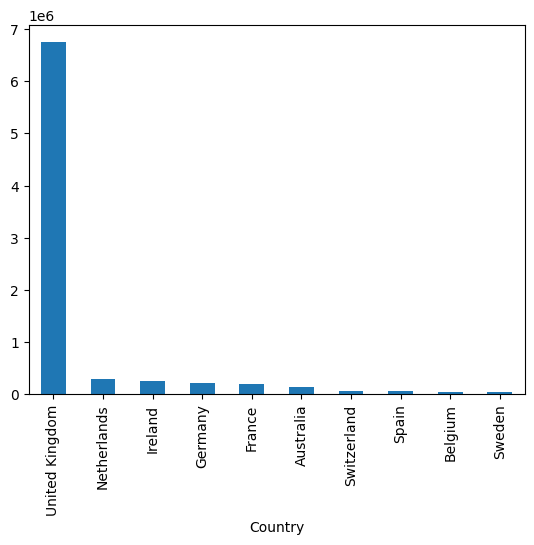

In [36]:
"""Visualize Top 10 countries"""

Countries_rank.head(10).plot(kind='bar')

<Axes: xlabel='Country'>

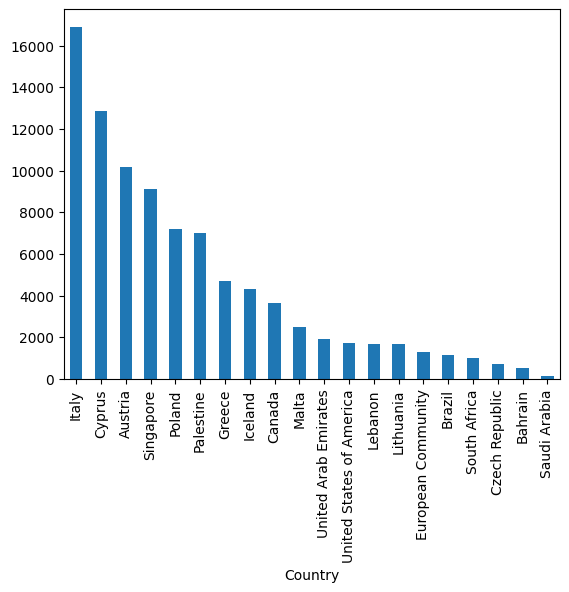

In [37]:
"""Visualize last 20 countries"""
Countries_rank.tail(20).plot(kind='bar')

<Axes: xlabel='Description,Year,Month'>

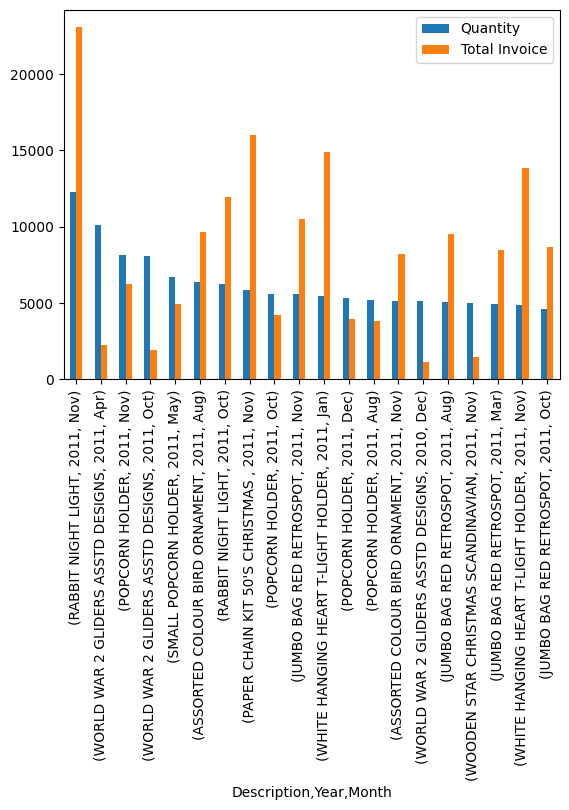

In [38]:
"""Visualize Top 20 Product selling Based on QUantity and  Total Incoice"""

P_Descriprion.head(20).plot(kind='bar')

Step 7:

Take Action:

Customer segmentation using RFM Module Based on Customer ID and Country

In [39]:
"""RFM is refering to the following:
*R: for Recency which means: How many Days since the last purchase
*F: for Frequency which  means: Number of times this client placed orders
*M: for Monetary which means: Total amount this Clinet spente"""

Customer_df['Date'] = pd.to_datetime(Customer_df['Date'])
Today_date = pd.to_datetime('2023-12-09')

RFM = Customer_df.groupby(["Country", "Customer ID"]).agg({
    'Date': lambda date: (Today_date - date.max()).days,
    'Invoice': 'nunique',
    'Total_Price': 'sum'
}).reset_index()
RFM.columns = ['Country', 'Customer ID', 'R', 'F', 'M']
del(Today_date)
RFM

,Country,Customer ID,R,F,M
0,Australia,12386.0,4720,2,401.90
1,Australia,12388.0,4398,6,2780.66
2,Australia,12393.0,4455,4,1632.40
3,Australia,12415.0,4407,21,124914.53
4,Australia,12422.0,4478,2,386.20
...,...,...,...,...,...
4337,United Kingdom,18287.0,4425,3,2032.88
4338,United States of America,12558.0,4390,1,269.96
4339,United States of America,12607.0,4443,1,1579.51
4340,United States of America,12646.0,4387,2,1346.97


In [40]:
"""Display the Describe for RFM"""
RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,4342.0,15296.373561,1724.287456,12346.00,13808.2500,15296.500,16777.750,18287.00
R,4342.0,4475.230309,100.151353,4383.00,4400.0000,4433.000,4525.000,4756.00
F,4342.0,4.266237,7.694498,1.00,1.0000,2.000,5.000,209.00
M,4342.0,2066.897495,9007.743129,3.75,307.9525,676.595,1670.245,280206.02


In [41]:
"""give clients 5 diffrent ranks based on Recency and sort them dissendly """
RFM["R Score"]=pd.qcut(RFM["R"],5, labels=[5,4,3,2,1])


In [42]:
"""Give Clients 5 diffrent Ranks based on Frequancy then sort them in order"""
RFM["F Score"]=pd.qcut(RFM["F"].rank(method="first"), 5,labels=[1,2,3,4,5])

In [43]:
"""Give Clients 5 diffrent Ranks based on Monetary then sort them in order"""
RFM["M Score"]=pd.qcut(RFM["M"],5,labels=[1,2,3,4,5])

In [44]:
"""To get the RFM Score we must to concatunate R score + F score + M score """
RFM["RFM Score"]=RFM["R Score"].astype(str)+RFM["F Score"].astype(str)+RFM["M Score"].astype(str)

In [45]:
"""Defind the Customer ranks based on their's RFM Score"""
def segment_score(score):
    score = int(score)
    if 111 <= score <= 155:
        return 'Bronze'
    elif 211 <= score <= 255:
        return 'Silver'
    elif 311 <= score <= 355:
        return 'Gold'
    elif 411 <= score <= 455:
        return 'Platinum'
    elif 511 <= score <= 555:
        return 'Titanium'
    else:
        pass

RFM["Segmentation"] = RFM["RFM Score"].apply(segment_score)

print(RFM)

                       Country  Customer ID     R   F          M R Score  \
0                    Australia      12386.0  4720   2     401.90       1   
1                    Australia      12388.0  4398   6    2780.66       4   
2                    Australia      12393.0  4455   4    1632.40       2   
3                    Australia      12415.0  4407  21  124914.53       4   
4                    Australia      12422.0  4478   2     386.20       2   
...                        ...          ...   ...  ..        ...     ...   
4337            United Kingdom      18287.0  4425   3    2032.88       3   
4338  United States of America      12558.0  4390   1     269.96       5   
4339  United States of America      12607.0  4443   1    1579.51       3   
4340  United States of America      12646.0  4387   2    1346.97       5   
4341  United States of America      12733.0  4617   1     383.95       1   

     F Score M Score RFM Score Segmentation  
0          2       2       122       Bron

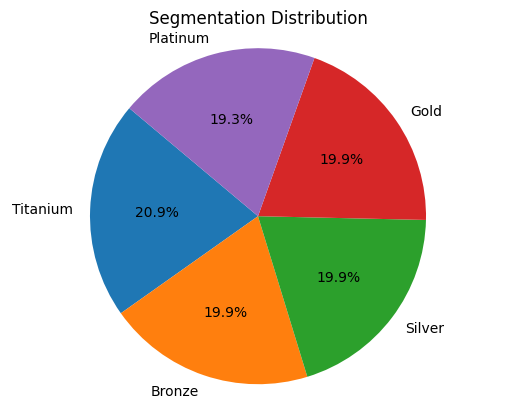

In [46]:
"""Visualize Segmentation score in pie chart"""
segment_counts = RFM['Segmentation'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Segmentation Distribution')
plt.show()

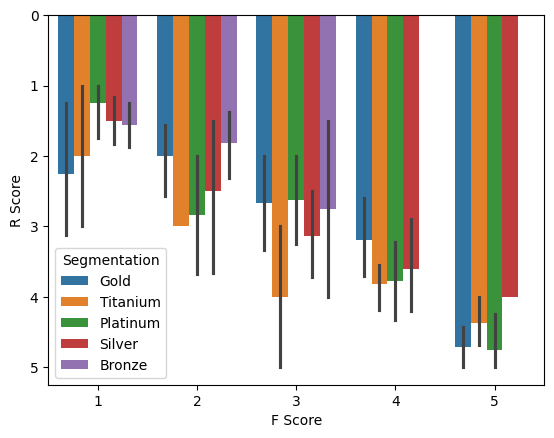

In [47]:
""" VIsualize F score and M score based on Segmentation"""

sns.barplot(x="F Score", y="M Score", hue="Segmentation", data=(RFM).sample(200))
try:
    plt.xlabel('F Score')
    plt.ylabel('R Score')
    plt.show()
except AttributeError:
    pass

In [48]:
"""Visalize RFM Score"""
px.bar(x="RFM Score", data_frame=RFM)


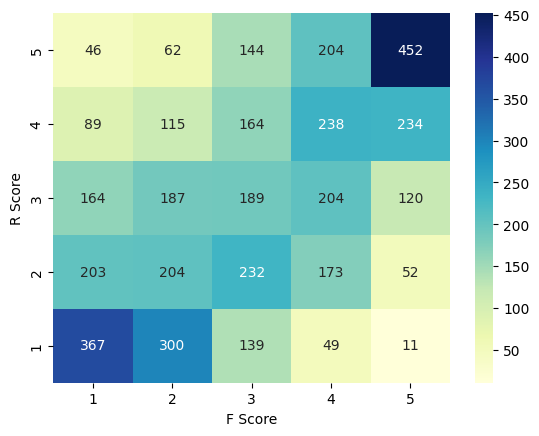

In [49]:
"""Visalize heat map for RFM Score"""
heatmap_data = RFM.pivot_table(index='R Score', columns='F Score', values='M Score', aggfunc='count')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
try:
    plt.xlabel('F Score')
    plt.ylabel('R Score')
    plt.show()
except AttributeError:
    pass

In [50]:
"""explore the Segegmentation"""
RFM.groupby("Segmentation").size()

Segmentation
Bronze      866
Gold        864
Platinum    840
Silver      864
Titanium    908
dtype: int64

In [51]:
RFM[["Segmentation", "R", "F", "M"]].groupby("Segmentation").agg({
    'F': ['mean', 'count', 'max', 'min'],
    'R': ['mean', 'count', 'max', 'min'],
    "M": ['mean', 'count', 'max', 'min']}).round()

F                      R                         M        \
             mean count  max min    mean count   max   min    mean count   
Segmentation                                                               
Bronze        2.0   866   34   1  4652.0   866  4756  4563   649.0   866   
Gold          3.0   864   63   1  4434.0   864  4454  4416  1339.0   864   
Platinum      5.0   840   51   1  4406.0   840  4415  4398  2031.0   840   
Silver        2.0   864   17   1  4498.0   864  4562  4455   913.0   864   
Titanium      9.0   908  209   1  4389.0   908  4397  4383  5243.0   908   

                              
                   max   min  
Segmentation                  
Bronze         77184.0   4.0  
Gold           81309.0   6.0  
Platinum      124915.0  21.0  
Silver         11073.0  13.0  
Titanium      280206.0  35.0

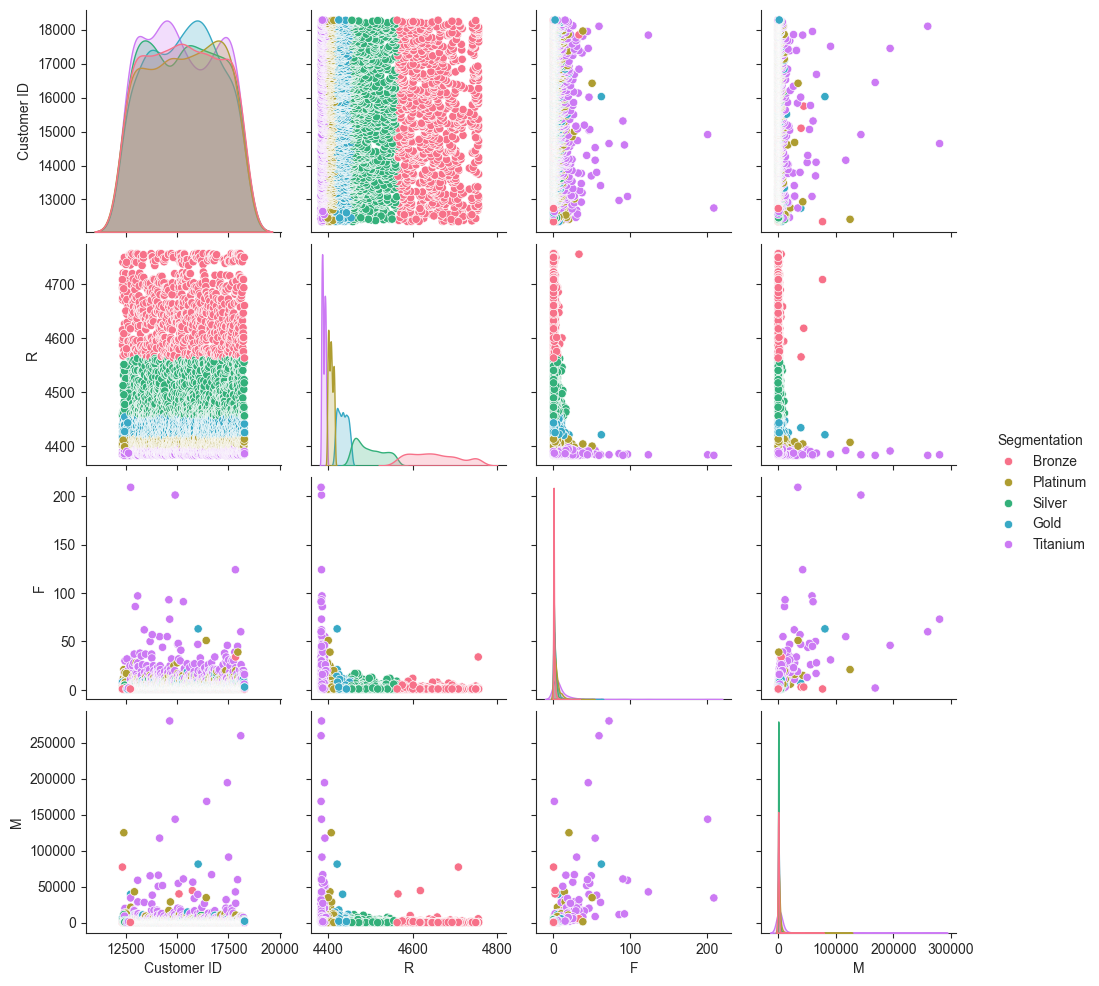

In [52]:
"""Visualize segmentataion """
sns.set_style("ticks")
sns.pairplot(RFM,hue = 'Segmentation',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

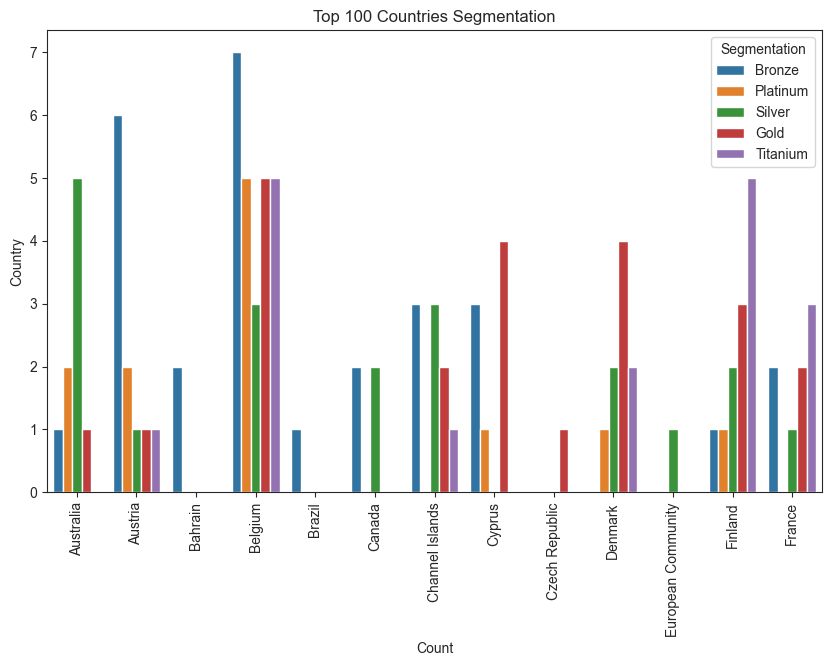

In [53]:
"""Visualize Country based on Segmentation score"""
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Segmentation', data=RFM.head(100))
plt.title('Top 100 Countries Segmentation')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Segmentation')
plt.xticks(rotation=90)
plt.show()

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Total_Price'}>, <Axes: >]], dtype=object)

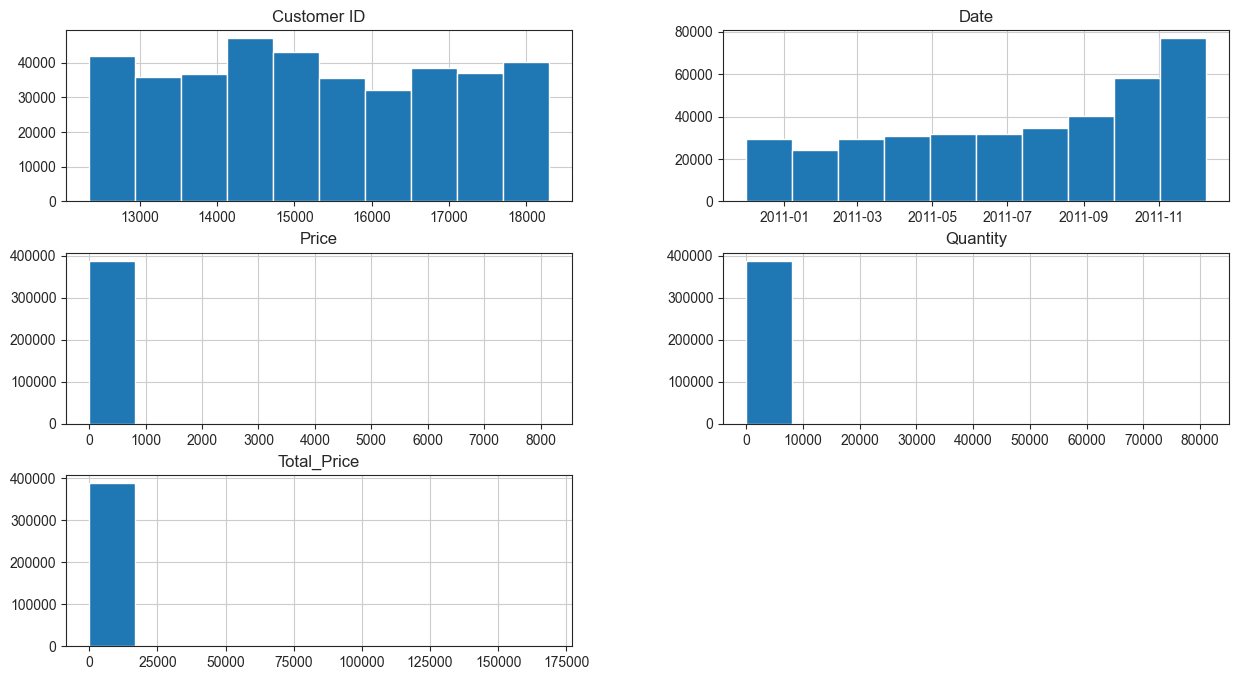

In [54]:
Customer_df.hist(figsize=(15,8))

Save the new data frame to CSV file

In [55]:
path = 'D:\courses\Technu lab\machine learning final project\Customer Segmentation\online+retail+ii/Customer_segmentation.csv'
Customer_df.to_csv(path, index=False)

<>:1: SyntaxWarning:

invalid escape sequence '\c'

<>:1: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\Moham\AppData\Local\Temp\ipykernel_28000\3576480089.py:1: SyntaxWarning:

invalid escape sequence '\c'



In [56]:
columns_to_remove=["Country","Customer ID","Segmentation","R Score","F Score","M Score","RFM Score"]
RFM_model=RFM.drop(columns_to_remove,axis=1)

In [57]:
RFM_Backup=RFM.copy()
RFM_Backup

,Country,Customer ID,R,F,M,R Score,F Score,M Score,RFM Score,Segmentation
0,Australia,12386.0,4720,2,401.90,1,2,2,122,Bronze
1,Australia,12388.0,4398,6,2780.66,4,4,5,445,Platinum
2,Australia,12393.0,4455,4,1632.40,2,4,4,244,Silver
3,Australia,12415.0,4407,21,124914.53,4,5,5,455,Platinum
4,Australia,12422.0,4478,2,386.20,2,2,2,222,Silver
...,...,...,...,...,...,...,...,...,...,...
4337,United Kingdom,18287.0,4425,3,2032.88,3,4,4,344,Gold
4338,United States of America,12558.0,4390,1,269.96,5,2,2,522,Titanium
4339,United States of America,12607.0,4443,1,1579.51,3,2,4,324,Gold
4340,United States of America,12646.0,4387,2,1346.97,5,3,4,534,Titanium


In [58]:
columns_to_remove=["Country","Customer ID"]
RFM.drop(columns_to_remove,axis=1,inplace= True)
RFM

,R,F,M,R Score,F Score,M Score,RFM Score,Segmentation
0,4720,2,401.90,1,2,2,122,Bronze
1,4398,6,2780.66,4,4,5,445,Platinum
2,4455,4,1632.40,2,4,4,244,Silver
3,4407,21,124914.53,4,5,5,455,Platinum
4,4478,2,386.20,2,2,2,222,Silver
...,...,...,...,...,...,...,...,...
4337,4425,3,2032.88,3,4,4,344,Gold
4338,4390,1,269.96,5,2,2,522,Titanium
4339,4443,1,1579.51,3,2,4,324,Gold
4340,4387,2,1346.97,5,3,4,534,Titanium


In [59]:
columns_to_remove=["Country","Customer ID","Segmentation","R Score","F Score","M Score","RFM Score"]
RFM_model=RFM_Backup.drop(columns_to_remove,axis=1)
RFM_model

,R,F,M
0,4720,2,401.90
1,4398,6,2780.66
2,4455,4,1632.40
3,4407,21,124914.53
4,4478,2,386.20
...,...,...,...
4337,4425,3,2032.88
4338,4390,1,269.96
4339,4443,1,1579.51
4340,4387,2,1346.97


In [60]:
path = 'D:\\courses\\Technu lab\\machine learning final project\\Customer Segmentation\\online+retail+ii\\RFM Score.csv'
RFM.to_csv(path, index=False)

path = 'D:\\courses\\Technu lab\\machine learning final project\\Customer Segmentation\\online+retail+ii\\RFM Model.csv'
RFM_model.to_csv(path, index=False)

path = 'D:\\courses\\Technu lab\\machine learning final project\\Customer Segmentation\\online+retail+ii\\RFM Backup.csv'
RFM_Backup.to_csv(path, index=False)

Step 8:
Data Build Modeling

In [61]:
"""replace the segmentation to numerical"""
mapping = {'Bronze': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4, 'Titanium': 5}
RFM['Segmentation'] = RFM['Segmentation'].replace(mapping)

In [62]:
"""Import required libraries for bulid modeling"""
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, minmax_scale, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
import pickle



In [63]:
"""split data to numerical and categorical""" 
"""numerical_cols = ['RFM Score']
categorical_cols = ['Country', 'Segmentation']
numerical_data = RFM[numerical_cols]
categorical_data = RFM[categorical_cols]
label_encoder = LabelEncoder()
RFM[categorical_cols] = categorical_data.apply(lambda col: label_encoder.fit_transform(col))"""

"numerical_cols = ['RFM Score']\ncategorical_cols = ['Country', 'Segmentation']\nnumerical_data = RFM[numerical_cols]\ncategorical_data = RFM[categorical_cols]\nlabel_encoder = LabelEncoder()\nRFM[categorical_cols] = categorical_data.apply(lambda col: label_encoder.fit_transform(col))"

In [64]:
scaler = StandardScaler()
RFM_model = scaler.fit_transform(RFM_model)

In [65]:
"""pca = PCA(n_components=2)
reduced_data = pca.fit_transform(RFM)"""

'pca = PCA(n_components=2)\nreduced_data = pca.fit_transform(RFM)'

C:\Users\Moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Moham\AppData\Local\Packages\PythonSo

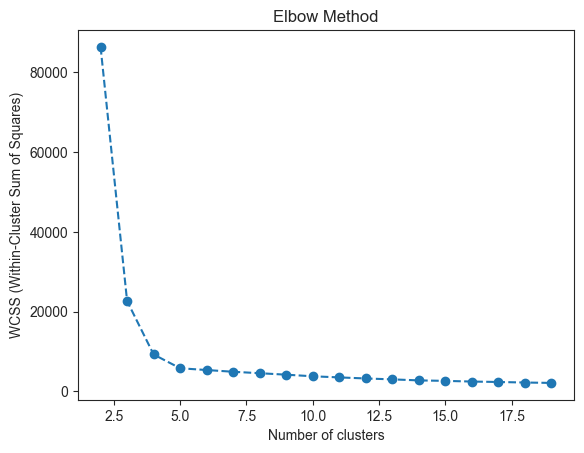

In [66]:
RFM_model, labels = make_blobs(n_samples=3000, centers=5, random_state=42)

wcss = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(RFM_model)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Now We recognize the optimal Number of K-Means = 5

In [67]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(RFM_model)
y_kmeans

C:\Users\Moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 1, ..., 2, 4, 3])

C:\Users\Moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



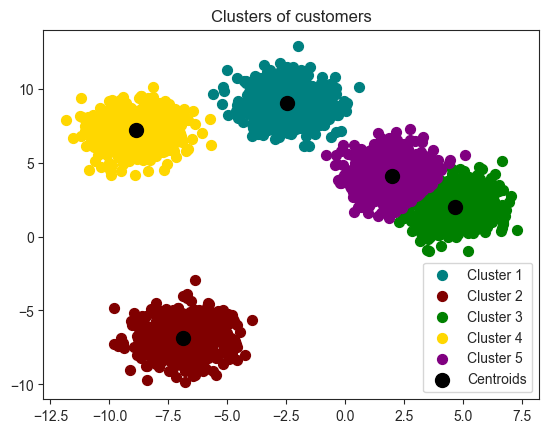

In [68]:
"""K-Means Clustering"""
RFM, labels = make_blobs(n_samples=3000, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(RFM)
kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(RFM, y_kmeans)
plt.scatter(RFM[y_kmeans == 0, 0], RFM[y_kmeans == 0, 1], s=50, c='teal', label='Cluster 1')
plt.scatter(RFM[y_kmeans == 1, 0], RFM[y_kmeans == 1, 1], s=50, c='maroon', label='Cluster 2')
plt.scatter(RFM[y_kmeans == 2, 0], RFM[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(RFM[y_kmeans == 3, 0], RFM[y_kmeans == 3, 1], s=50, c='Gold', label='Cluster 4')
plt.scatter(RFM[y_kmeans == 4, 0], RFM[y_kmeans == 4, 1], s=50, c='purple', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='Black', marker='o', label='Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()

In [69]:
RFM_model, labels = make_blobs(n_samples=3000, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(RFM_model)
labels = kmeans.labels_
silhouette_avg = silhouette_score(RFM_model, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

C:\Users\Moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.67


In [70]:
"""KMeans clustering"""
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(RFM_model)
y_kmeans = kmeans.labels_

"""Agglomerative Hierarchical Clustering"""
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(RFM_model)

"""DBSCAN clustering"""
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(RFM_model)

"""Calculate Silhouette Scores"""
silhouette_kmeans = silhouette_score(RFM_model, y_kmeans)
silhouette_hierarchical = silhouette_score(RFM_model, hierarchical_labels)
silhouette_dbscan = silhouette_score(RFM_model, dbscan_labels)  # Use dbscan_labels here

"""Calculate Davies-Bouldin Index"""
db_index_kmeans = davies_bouldin_score(RFM_model, y_kmeans)
db_index_hierarchical = davies_bouldin_score(RFM_model, hierarchical_labels)
db_index_dbscan = davies_bouldin_score(RFM_model, dbscan_labels)  # Use dbscan_labels here

print("Silhouette Scores:")
print("KMeans:", silhouette_kmeans)
print("Hierarchical:", silhouette_hierarchical)
print("DBSCAN:", silhouette_dbscan)
print("\nDavies-Bouldin Index:")
print("KMeans:", db_index_kmeans)
print("Hierarchical:", db_index_hierarchical)
print("DBSCAN:", db_index_dbscan)


C:\Users\Moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Scores:
KMeans: 0.6691934316423932
Hierarchical: 0.5912047964013347
DBSCAN: 0.24235856164171954

Davies-Bouldin Index:
KMeans: 0.4678443694296117
Hierarchical: 0.49965423516524365
DBSCAN: 1.6897223003604254


Now We find that we will get the best Result when we use K-Means

Save Model

In [71]:
pickle.dump(kmeans,open('model.pkl','wb'))